# 🧠 DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING
## Background & Scenario
The Adult dataset contains census data used to predict whether a person earns more than $50K/year based on demographics, education, occupation, and other factors. Preprocessing, feature engineering, and feature selection are essential to prepare this dataset for machine learning models, ensuring accurate and efficient predictions.
### Objective
•	Handle missing values and encode categorical variables

•	Scale numerical features using Standard and Min-Max scaling

•	Engineer new features and apply transformations for skewed data

•	Detect outliers using Isolation Forest

•	Select the most informative features using Mutual Information

•	Analyze feature relationships using correlation


## 1. Import Required Libraries

In [1]:

# 1. Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.feature_selection import mutual_info_classif


## 2. Load Dataset

In [6]:

#  2. Load Dataset
file_path=r"D:\Data sciences\Assignments\Assignment files\Assignment files Extracs\EDA2\adult_with_headers.csv"
df = pd.read_csv(file_path)
print(" Dataset Loaded")
print(df.info())
print(df.head())


 Dataset Loaded
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None
   age          workclass  fnlwgt   education  education_num  \
0   39  

## 3. Data Exploration & Preprocessing

In [7]:

# 3. Data Exploration & Preprocessing
print("\n Missing Value Check (count of '?'):")
print(df.isin(['?']).sum())

# Replace '?' with NaN
df.replace("?", np.nan, inplace=True)

# Handle missing values by filling with mode (most frequent value)
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])

print("\n Missing values handled")



 Missing Value Check (count of '?'):
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

 Missing values handled


### Explanation:

•	Missing values in categorical columns handled by filling with the mode, ensuring no NaNs remain.


## 4. Scaling Numerical Features

In [8]:

# 4 Scaling numerical features
num_cols = ['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']

# Standard Scaling
scaler_std = StandardScaler()
df_std = df.copy()
df_std[num_cols] = scaler_std.fit_transform(df_std[num_cols])

# Min-Max Scaling
scaler_mm = MinMaxScaler()
df_mm = df.copy()
df_mm[num_cols] = scaler_mm.fit_transform(df_mm[num_cols])

print("\n Scaling Applied (Standard + MinMax)")



 Scaling Applied (Standard + MinMax)


### Explanation:
•	Standard Scaling: Centers features to mean=0, std=1, useful for distance-based models.

•	Min-Max Scaling: Scales features to [0,1], useful for gradient-based models.


## 5. Encoding Techniques

In [9]:

# 5. Encoding Techniques
# One-Hot Encoding for categorical variables with < 5 categories
ohe_cols = [col for col in df.columns if df[col].dtype=='object' and df[col].nunique() <= 5]

df_encoded = pd.get_dummies(df, columns=ohe_cols, drop_first=True)

# Label Encoding for categorical variables with > 5 categories
label_cols = [col for col in df.columns if df[col].dtype=='object' and df[col].nunique() > 5]

le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

print("\n Encoding Completed")
print(df_encoded.head())



 Encoding Completed
   age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   

   occupation  relationship  capital_gain  capital_loss  hours_per_week  \
0           1             1          2174             0              40   
1           4             0             0             0              13   
2           6             1             0             0              40   
3           6             0             0             0              40   
4          10             5             0             0              40   

   native_country  race_ Asian-Pac-Islander  race_ Black  race_ Other  \
0              39           

### Explanation:
•	One-Hot Encoding: Converts low-cardinality categorical variables into binary columns.

•	Label Encoding: Converts high-cardinality categorical variables into numeric labels.


##  6. Feature Engineering
 


In [10]:

# 6. Feature Engineering
# New feature 1: Age group
df_encoded['age_group'] = pd.cut(df['age'], bins=[0,25,45,65,100], labels=['Young','Adult','Middle-Aged','Senior'])

# New feature 2: Work hours category
df_encoded['work_hours_category'] = pd.cut(df['hours_per_week'], bins=[0,20,40,60,100], labels=['Part-time','Full-time','Overtime','Extreme'])

# Transformation: log-transform skewed features
df_encoded['capital_gain_log'] = np.log1p(df['capital_gain'])
df_encoded['capital_loss_log'] = np.log1p(df['capital_loss'])

print("\n Feature Engineering Completed")



 Feature Engineering Completed


### Explanation:
•	Created age groups and work hours categories to improve feature interpretability.

•	Log-transformed capital gain/loss to reduce skewness.


## 7. Feature Selection - Outlier Detection

In [11]:

# 7. Feature Selection - Outlier Detection
iso = IsolationForest(contamination=0.01, random_state=42)
outliers = iso.fit_predict(df[num_cols])
df_no_outliers = df[outliers == 1]

print("\n Isolation Forest Applied. Removed outliers:", len(df) - len(df_no_outliers))



 Isolation Forest Applied. Removed outliers: 326


### Explanation:
•	Outliers detected and removed to prevent them from negatively affecting model performance.


## 8. Feature Selection - Mutual Information

In [12]:

#  8. Feature Selection - Mutual Information
from sklearn.feature_selection import mutual_info_classif

# Encode target variable (binary: 1 = >50K, 0 = <=50K)
y = df['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)

# Feature matrix
X = df_encoded.copy()
if "income" in X.columns:
    X = X.drop("income", axis=1)

# Ensure numeric & drop constants
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)
X = X.loc[:, (X != X.iloc[0]).any()]   # remove constant columns

print("\n Shape after removing constant cols:", X.shape)

# Mutual Information Scores
mi_scores = mutual_info_classif(X, y, discrete_features='auto')
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

print("\n Mutual Information Scores (Top 10):")
print(mi_scores.head(10))



 Shape after removing constant cols: (32561, 20)

 Mutual Information Scores (Top 10):
income_ >50K        0.553270
relationship        0.116918
marital_status      0.110127
capital_gain_log    0.082513
capital_gain        0.082218
age                 0.064170
education           0.063330
education_num       0.062844
occupation          0.061772
hours_per_week      0.043651
dtype: float64


### Explanation:
•	Shows which features carry the most predictive information for income.


## 9. Correlation Analysis



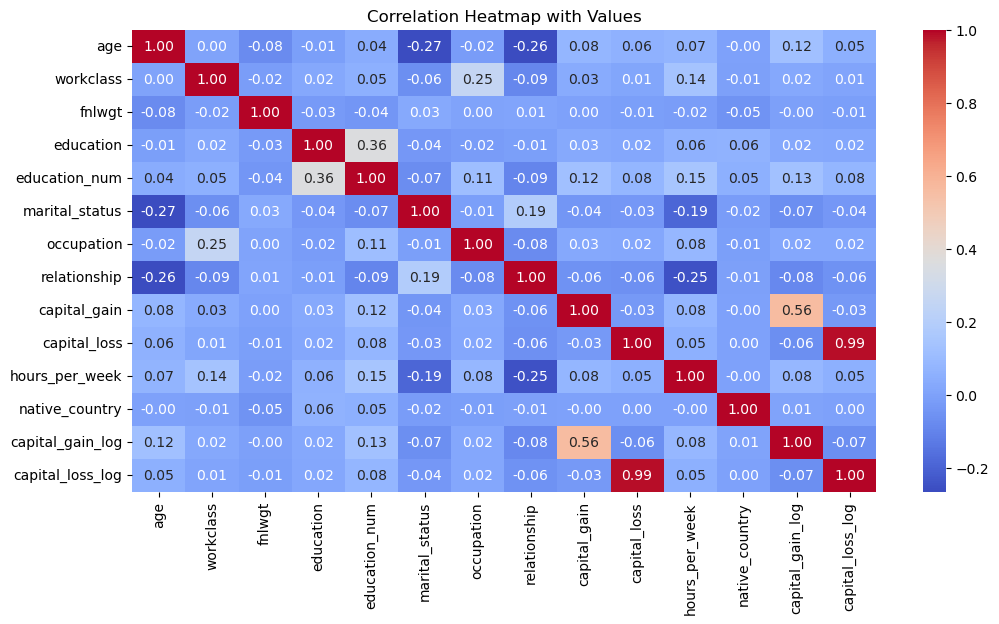


 Assignment Completed Successfully!


In [13]:

# 9 Compare with Correlation Matrix
plt.figure(figsize=(12,6))
sns.heatmap(
    df_encoded.select_dtypes(include=[np.number]).corr(),
    cmap="coolwarm",
    annot=True,
    fmt=".2f"
)
plt.title("Correlation Heatmap with Values")
plt.show()

print("\n Assignment Completed Successfully!")


### Explanation:
•	Visualizes linear relationships between numeric features.

•	Heatmap includes values inside each cell for clarity.


## 🎯 10. Conclusion
•	Dataset preprocessed successfully: missing values handled, features scaled, categorical variables encoded.

•	New features engineered; outliers removed.

•	Mutual information and correlation analysis identified important features.

•	Dataset is now ready for machine learning modeling.
